In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

### Linear Combinations ###
If $X$ and $Y$ are independent normal variables, then any linear combination $aX + bY + c$ has a normal distribution. We proved this in an earlier section using moment generating functions. We will now show that the same is true if $X$ and $Y$ have any bivariate normal distribution.



We have defined standard bivariate normal random variables as follows:

If $X$ and $Z$ are i.i.d standard normal, and
$$
Y = \rho X + \sqrt{1 - \rho^2} Z
$$

then $X$ and $Y$ have the standard bivariate normal distribution with correlation $\rho$. 

Thus if $X$ and $Y$ are standard bivariate normal, then $Y$ is a linear combination of the independent normal variables $X$ and $Z$. Hence any linear combination $aX + bY + c$ can be written as a different linear combination of the independent normal variables $X$ and $Z$. Thus the distribution of $aX + bY + c$ is normal.

If $X$ and $Y$ have a bivariate normal distribution but are not standardized, then $X = X^* \cdot\sigma_X + \mu_X$ and $Y = Y^*\cdot\sigma_Y + \mu_Y$ where $X^*$ and $Y^*$ are standard bivariate normal. 

So any linear combination of $X$ and $Y$ is a different linear combination of $X^*$ and $Y^*$, and hence is normal.

### Sum and Difference ###
Let $X$ and $Y$ have the bivariate normal distribution with parameters $(\mu_X, \mu_Y, \sigma_X^2, \sigma_Y^2, \rho)$. Then the sum $X + Y$ has the normal distribution with mean $\mu_X + \mu_Y$ and variance

$$
\sigma_{X+Y}^2 ~ = ~ Var(X + Y) ~ = ~ \sigma_X^2 + \sigma_Y^2 + 2\rho\sigma_X\sigma_Y
$$

The difference $X - Y$ has the normal distribution with mean $\mu_X - \mu_Y$ and variance

$$
\sigma_{X-Y}^2 ~ = ~ Var(X - Y) ~ = ~ \sigma_X^2 + \sigma_Y^2 - 2\rho\sigma_X\sigma_Y
$$

No matter what the linear combination of $X$ and $Y$, its distribution is normal and you can work out the mean and variance using properties of means and variances.

Notice that no matter what the joint distribution of $X$ and $Y$,

$$
Cov(X+Y, X-Y) ~ = ~ Cov(X, X) - Cov(X, Y) + Cov(Y, X) - Cov(Y, Y)
~ = ~ \sigma_X^2 - \sigma_Y^2
$$

and the correlation between the sum and difference is
$$
r(X+Y, X-Y) ~ = ~ \frac{\sigma_X^2 - \sigma_Y^2}{\sigma_{X+Y}\sigma_{X-Y}}
$$

Each of the two linear combinations $X+Y$ and $X-Y$ is normal, and we have identified the two means, the two variances, and the correlation. It turns out (though we will not prove this) that the *joint* distribution of $X+Y$ and $X-Y$ is bivariate normal with the five parameters that we have identified.

If $X$ and $Y$ are bivariate normal variables with equal variances, then $X+Y$ and $X-Y$ have a bivariate normal distribution with

$$
Cov(X+Y, X-Y) ~ = ~ \sigma_X^2 - \sigma_Y^2 ~ = ~ 0
$$ 

Remember that uncorrelated bivariate normal random variables are independent.  Thus if $X$ and $Y$ are bivariate normal variables with equal variances, then their sum $X+Y$ and difference $X-Y$ are *independent* normal variables. The condition "bivariate normal with equal variances" is satisfied by i.i.d. normal variables, for example.

### Joint Distributions of Linear Combinations ###
Let $X$ and $Y$ have a bivariate normal distribution. Then the linear combinations $aX + bY + c$ and $dX + eY + f$ have the bivariate normal distribution with parameters determined by rules of expectation and variance applied to the parameters of $X$ and $Y$.

We will not prove this result but it is fundamentally important for calculation. In practical terms it says that you can operate fearlessly with bivariate normal random variables just as you would with independent normal random variables. Just keep in mind that there will be some covariance terms involved in variance calculations.

#### Normal Marginals and Conditionals ####
What you get from identifying a bivariate normal distribution for random variables $X$ and $Y$ is that numerous interesting distributions are normal. You just have to find the means and variances, and then you can use normal curve methods to find probabilities.

All of the following distributions are normal:
- The marginal distributions of $X$ and $Y$
- For each $x$, the conditional distribution of $Y$ given $X=x$
- For each $y$, the conditional distribution of $X$ given $Y=y$

For example, let $M$ be the midterm score and $F$ the final exam score of a student picked at random from a large class, and suppose $M$ and $F$ have the bivariate normal distribution with parameters $(66, 73, 10^2, 8^2, 0.6)$. Clearly this model can only be a very rough approximation to data, especially if the scores are discrete, but we will work with it here as an idealization.

Suppose the overall score $S$ will be computed as $S = 0.3M + 0.7F$. What is the joint distribution of $F$ and $S$?

It's bivariate normal. All you have to do is find the five parameters. This boils down to being able to work with means and variances.

You already know two of the parameters: $\mu_F = 73$ and $\sigma_F^2 = 8^2 = 64$.

Also, $\mu_S = 0.3*66 + 0.7*73 = 70.9$.

In [2]:
0.3*66 + 0.7*73

70.89999999999999

To find $\sigma_S^2$ and $r(F, S)$, it's a good idea to find some covariances first.

- $Cov(M, F) = 0.6 \cdot 10 \cdot 8 = 48$
- $Cov(F, S) = 0.3Cov(F, M) + 0.7Var(F) = 0.3 \cdot 48 + 0.7 \cdot 64 = 59.2$

In [4]:
0.3*48 + 0.7*64

59.199999999999996

The variance of $S$ is
$$
\sigma_S^2 ~ = ~ 0.3^2 \cdot 100 ~ + ~ 0.7^2 \cdot 64 ~ + ~ 2 \cdot 0.3 \cdot 0.7 \cdot 48 ~ = ~ 60.52
$$

In [53]:
(0.3**2)*100 + (0.7**2)*64 + 2*0.3*0.7*48

60.519999999999996

The final parameter of the bivariate normal is the correlation between $F$ and $S$.

$$
r(F, S) ~ = ~ \frac{59.2}{8 \cdot \sqrt{60.52}} ~ = ~ 0.95
$$

In [6]:
59.2/(8*(60.52**0.5))

0.9512228189487625

Notice how large the correlation is. That's because $F$ is a big component of $S$.

Also note that the correlation is a function of all of the covariances: $Cov(F, F)$, $Cov(F, S)$, and $Cov(S, S)$.

### A Different Parametrization ###
A common parametrization of bivariate normal variables has two components.
- The *mean vector* which in this case is $(\mu_F, \mu_S)$:

In [ ]:
means = [73, 70.9]

- The *covariance matrix*, also called the *variance-covariance matrix*, which is an organized array of the variances:

$$
\begin{pmatrix}
Cov(F, F) & Cov(F, S)\\
Cov(S, F) & Cov(S, S)
\end{pmatrix}
$$

For use with `SciPy` we can simply enter this matrix as an array of rows. Notice the use of $Cov(F, S) = Cov(S, F)$.

In [ ]:
covariances = [[64, 59.2], [59.2, 60.52]]

The `SciPy` method `stats.multivariate_normal.rvs` generates i.i.d. points from a multivariate (or bivariate, in our present case) normal distribution. The arguments are `size` which is the number of points to generate, `mean` which is the mean vector, and `cov` which is the covariance matrix.

Here is one generated value of $(F, S)$.

In [52]:
stats.multivariate_normal.rvs(size = 1, mean = means, cov = covariances)

array([ 51.82245434,  47.12608967])

The code in the cell below generates 500 such points and draws the scatter plot. The tight clustering corresponds to the high value of the correlation between $F$ and $S$.

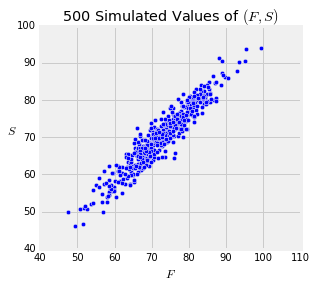

In [54]:
n = 500 # set sample size

# Generate bivariate normal points
points = stats.multivariate_normal.rvs(size=n, mean=means, cov=covariances)
final = points[0:n, 0]   # array of x-values
overall = points[0:n, 1] # array of y-values

# Plot
plt.scatter(final, overall)
plt.xlabel('$F$')
plt.ylabel('$S$', rotation=0)
plt.title(str(n)+' Simulated Values of $(F, S)$')
plt.axes().set_aspect('equal')